In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4
plt.style.use('ggplot')

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



wind speed occurring every 50 years:  32.97989844019469


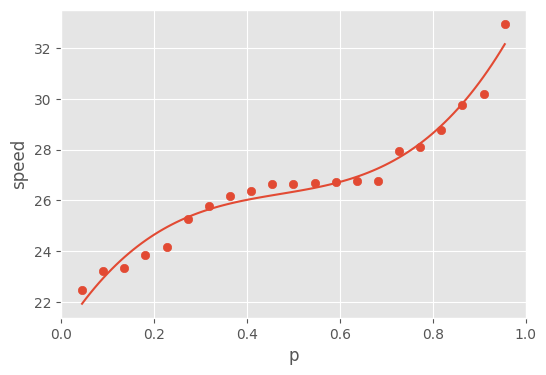

In [154]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

#Sort the array
# Get the indices that would sort the array
sorting_indices = np.argsort(max_speeds)
sort_speeds= max_speeds[sorting_indices]

#Compute the cumulative distr function
p=(np.arange(years_nb)+1)/(years_nb+1) #Correct formula
#We know that p(0)=0, 
#p=p[sorting_indices] #We reorder p by the speed

"""
#plot the cumulative probability
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(sort_speeds, p); 
plt.xlabel("speed");
plt.ylabel("cprob");
"""

#plot the quantile function
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(p, sort_speeds); 
plt.xlabel("p");
plt.ylabel("speed");

#Fit the quantile function
from scipy.interpolate import UnivariateSpline
# linear interpolation
x=np.linspace(np.min(p),np.max(p),100)
quantile_func = UnivariateSpline(p, sort_speeds)
interp_speed = quantile_func(x)

#plot
plt.plot(x, interp_speed)


#Upper quantile
fifty_prob = 1. - 0.02

#Wind speed occurring every 50 years can be guessed as:

fifty_wind = quantile_func(fifty_prob)
#plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'k--')

print("wind speed occurring every 50 years: ", fifty_wind)

Text(0, 0.5, 'Cumulative probability')

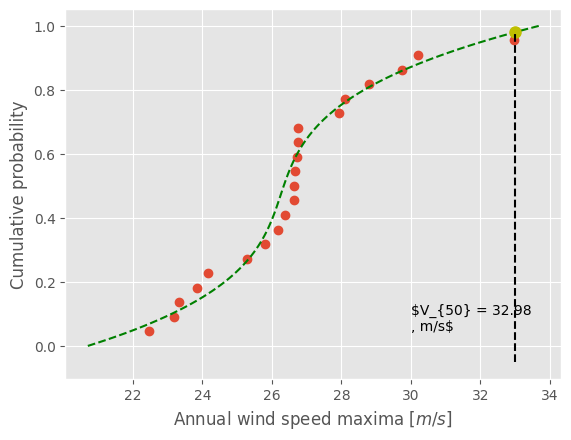

In [155]:
#Solution found on the internet

import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)
speed_spline = UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 100)
fitted_max_speeds = speed_spline(nprob)

fifty_prob = 1. - 0.02
fifty_wind = speed_spline(fifty_prob)

plt.figure()
plt.plot(sorted_max_speeds, cprob, 'o')
plt.plot(fitted_max_speeds, nprob, 'g--')
plt.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
plt.text(30, 0.05, '$V_{50} = %.2f \n, m/s$' % fifty_wind)
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'k--')
plt.xlabel('Annual wind speed maxima [$m/s$]')
plt.ylabel('Cumulative probability')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

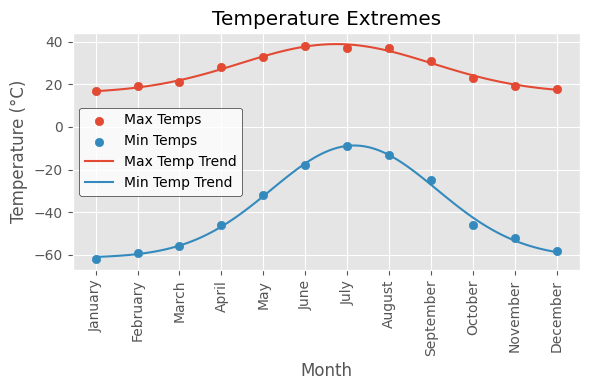

In [156]:
from scipy import optimize, stats

max=[17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
month= ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# . Plot the temperature extremes
plt.figure(figsize=(6, 4))
t=np.arange(12)
plt.scatter(t, max, label='Max Temps')
plt.scatter(t, min, label='Min Temps')
plt.title("Temperature Extremes")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(t, month, rotation=90) # Rotate month names vertically
plt.tight_layout()       # Adjust layout to fit rotated labels


# . Define a function that can describe min and max temperatures

def T_func(x,A,b,m,s):
#    return list(map(x, lambda t: A*stats.norm.pdf(t,loc=m, scale= s)+b))
    return  np.vectorize(lambda t: A * stats.norm.pdf(t, loc=m, scale=s) + b)(x)
    


def T_max(x):
    params,_ =optimize.curve_fit(T_func,np.arange(12), max, p0=[2, 2,2,2])
    return T_func(x,params[0],params[1],params[2],params[3])

def T_min(x):
    params,_ =optimize.curve_fit(T_func,np.arange(12), min, p0=[3, 0,2,2])
    return T_func(x,params[0],params[1],params[2],params[3])


t=np.linspace(0,11,100)
plt.plot(t, T_max(t), label='Max Temp Trend')
plt.plot(t, T_min(t), label='Min Temp Trend')

# Customize and display the legend
plt.legend(facecolor='white', edgecolor='black', frameon=True, loc='best')
plt.show()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


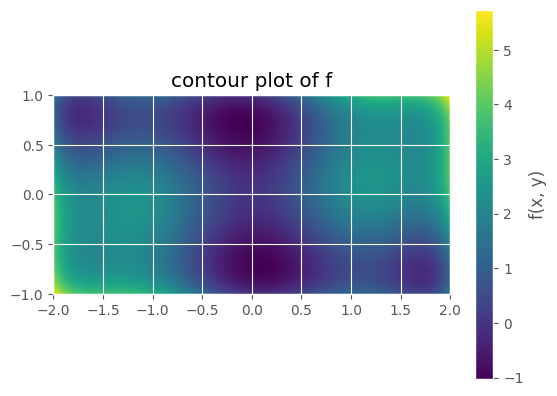

Global minima at:  [-0.0898  0.7127] [ 0.0898 -0.7127] with value  -1.0316284534898665


In [245]:
#Short version on how to do it

import pylab as plt
from scipy import optimize

#Function to optimize:
def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

#plot
def f_plot(x,y):
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2

x_dom=np.linspace(-2,2,int(1e3)) #domain x and y
y_dom=np.linspace(-1,1,int(1e3))

x,y=np.meshgrid(x_dom,y_dom)

plt.title("contour plot of f")
plt.imshow(f_plot(x,y),extent=[x_dom.min(),x_dom.max(),y_dom.min(),y_dom.max()],cmap="viridis",origin="lower")
plt.colorbar(label="f(x, y)")
plt.show()

#Shorter optimization
#Domain of initial conditions for optimization:
N=10
x_box=np.linspace(-2,2,N) #domain x and y
y_box=np.linspace(-1,1,N)

x_L,y_L=np.meshgrid(x_box,y_box)
x_L=x_L.flatten()
y_L=y_L.flatten()

#Looking at the graph we can deduce:
min1=optimize.minimize(f,x0=[0,0.5])
min2=optimize.minimize(f,x0=[0,-0.5])
print("Global minima at: ", min1.x, min2.x,"with value ",min1.fun)

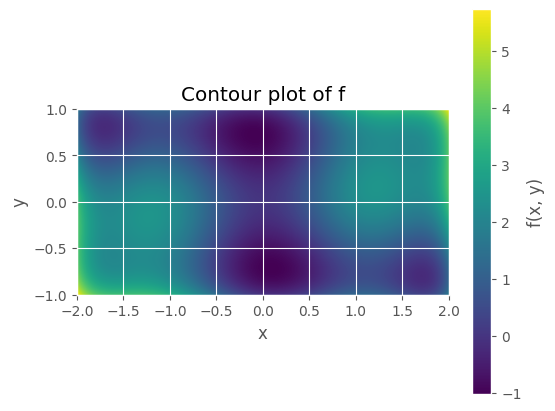

In [212]:
import pylab as plt

def f(x):
    # x[0] is x, x[1] is y
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (4 * x[1]**2 - 4) * x[1]**2

#Version for easier plotting on the mesh
def f_plot(x, y):
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (4 * y**2 - 4) * y**2


#Our domain
x=np.linspace(-2,2,int(1e3))
y=np.linspace(-1,1,int(1e3))

#Plotting
xv, yv = np.meshgrid(x, y, indexing='xy')
z=f_plot(xv,yv)


# Visualize the grid using pylab.imshow
plt.figure(figsize=(6, 5))
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.colorbar(label="f(x, y)")  # Add a color bar
plt.title("Contour plot of f")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [70]:
#Minimization

#Easier to rember version of the optimization:

    
# Initial guess for x and y
N=10
x_box=np.linspace(-2,2,N)
y_box=np.linspace(-1,1,N)

#We redefine a (flattened) mesh
guess_x, guess_y= np.meshgrid(x_box, y_box, indexing='xy')
guess_x=guess_x.flatten()
guess_y=guess_y.flatten() 

# Minimize the function
results = [optimize.minimize(f, x0=x0) for x0 in zip(guess_x,guess_y)] #We minimize with i.c. other the mesh

# Find the minimum function value
min_value = np.min([results[i].fun for i in np.arange(len(results))])

# Find all indices where the function value is equal to the minimum
min_indices = [i for i, res in enumerate(results) if np.isclose(res.fun, min_value)]

# Retrieve all results corresponding to the global minima
results = [results[i] for i in min_indices]

### Eliminate the redundant results
# Assuming `results` contains the minimization results
x_arrays = [results[i].x for i in np.arange(len(results))]

# Define a tolerance for comparison (to handle numerical errors)
tol = 1e-6

# List to hold the unique results
unique_results = []
seen = []

for res in results:
    # Flatten the current array (just to handle them as 1D arrays for comparison)
    flattened_x = res.x.flatten()
    
    # Check if this flattened array is already seen within tolerance
    is_duplicate = any(np.allclose(flattened_x, seen_x, atol=tol) for seen_x in seen)
    
    if not is_duplicate:
        # Add the result to unique_results if it's not a duplicate
        unique_results.append(res)
        seen.append(flattened_x)

# `unique_results` now contains only unique x arrays
####


# Display the results
for result in unique_results:
    print("Optimal values for x and y:", result.x)
    print("Minimum value of the function:", result.fun)

#There seem to be only two global optimum

Optimal values for x and y: [ 0.0898 -0.7127]
Minimum value of the function: -1.031628453489659
Optimal values for x and y: [-0.0898  0.7127]
Minimum value of the function: -1.0316284534898628


In [71]:
#If we start from (0,0) we find:
result=optimize.minimize(f, x0=[0,0])

print("Optimal values for x and y:", result.x)
print("Minimum value of the function:", result.fun)

#This is probably due to the fact that (0,0) is a LOCAL minima

Optimal values for x and y: [0. 0.]
Minimum value of the function: 0.0


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [109]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt -O populations.txt

--2024-12-19 19:53:58--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/qnkkslc4wt15bziu8c8do/populations.txt?rlkey=mxkget6g834glvegmf12yl2op [segue]
--2024-12-19 19:53:59--  https://www.dropbox.com/scl/fi/qnkkslc4wt15bziu8c8do/populations.txt?rlkey=mxkget6g834glvegmf12yl2op
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc404b58105c5ef2c285f16f1509.dl.dropboxusercontent.com/cd/0/inline/CgmOb-YlLAMD9hWjqba48ow6z43nc_Ar2izaOucfZLmio3tvdoVUucUR3cr9Zq97p3VZSaxp03jKG7gz01NK2YVc5DMiq8eenCbw7D4Oq31f7NDx4063T5_fgBYP2M-o-sY/file# [segue]
--2024-12-19 19:53:59--  https://uc404b58105c5ef2c285f16f1509.dl.dropboxusercontent.com/cd/0/inline/CgmOb-YlLAMD9

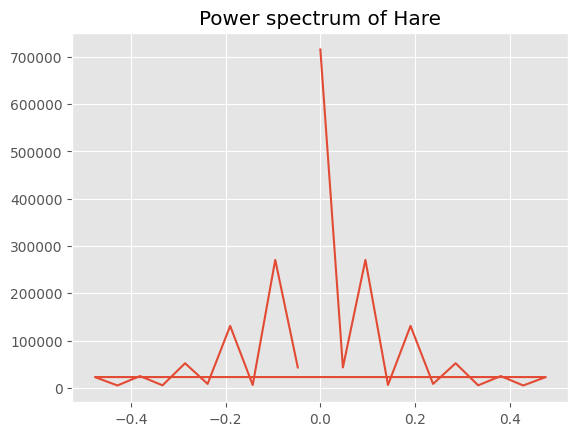

In [301]:
#Trial:
from scipy import fftpack
from matplotlib import pyplot as plt
import pandas as pd

df=pd.read_csv("populations.txt",delimiter="\t")
df.head()

sig=np.array(df[["hare"]])

sig_fft = fftpack.fft(np.array(df["hare"]))

sig_fft=fftpack.fft(np.array(df["hare"]))
time_step = 1

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig_fft.size, d=time_step)

# Find the peak frequency: we can focus on only the positive frequencies
freqs=sample_freq
#mask=np.where(sample_freq>0)
#freqs = sample_freq[mask]
#power=power[mask]

# An inner plot to show the peak frequency
plt.title('Power spectrum of Hare')
plt.plot(freqs, power)
plt.show()

   # year     hare     lynx  carrot
0    1900  30000.0   4000.0   48300
1    1901  47200.0   6100.0   48200
2    1902  70200.0   9800.0   41500
3    1903  77400.0  35200.0   38200
4    1904  36300.0  59400.0   40600


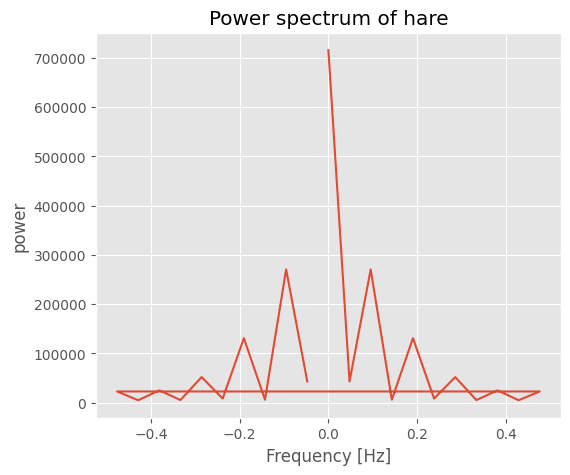

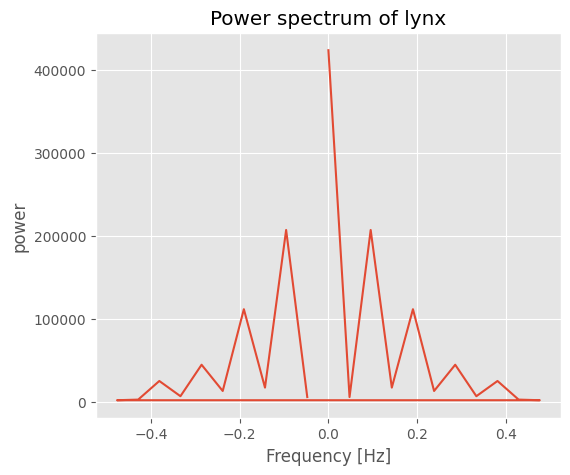

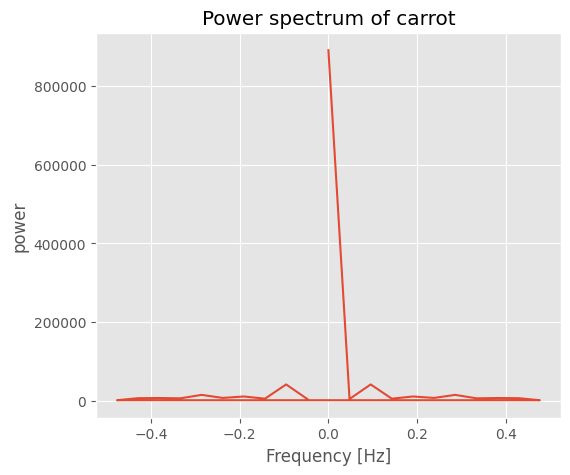

In [274]:
from scipy import fftpack
import pandas as pd

#Read dataset
df = pd.read_csv('populations.txt',delimiter="\t")
print(df.head())

#Periodicity analysis
k1=fftpack.fft(np.array(df["hare"]))
k2=fftpack.fft(np.array(df["lynx"]))
k3=fftpack.fft(np.array(df["carrot"]))


def plot_freq(ch, label):
    #ch: channel to do frequency analysis
    # Power (sig_fft is of complex dtype)
    
    power = np.abs(ch)
    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(ch.size, d=1) #d=timestep= 1 year
    # Plot the FFT power
    plt.figure(figsize=(6, 5))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('power')
    plt.title("Power spectrum of "+ label)

plot_freq(k1,"hare")
plot_freq(k2,"lynx")
plot_freq(k3,"carrot")

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

In [74]:
from scipy.fftpack import fft2, ifft2,fftshift,fftfreq
#Import image
moon=plt.imread("moonlanding.png")

spect_moon=fft2(moon)

def plot_freq_2d(ch):
    #ch: channel to do frequency analysis
    # Power (sig_fft is of complex dtype)
    
    power = np.abs(sgn)
    #sgn: our 2d signal to analyse
    # The corresponding frequencies
    ch= fftpack.fft(sgn)
    sample_freq = fftpack.fftfreq(ch.size, d=1) #d=timestep= 1 year
    # Plot the FFT power
    plt.figure(figsize=(6, 5))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('power')
    plt.title("Power spectrum of moon")


#Da risolvere
#np.allclose(moon, ifft2(fft2(moon)))

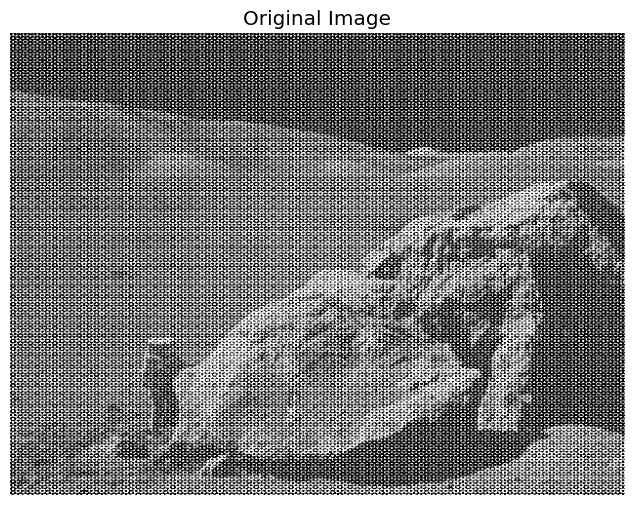

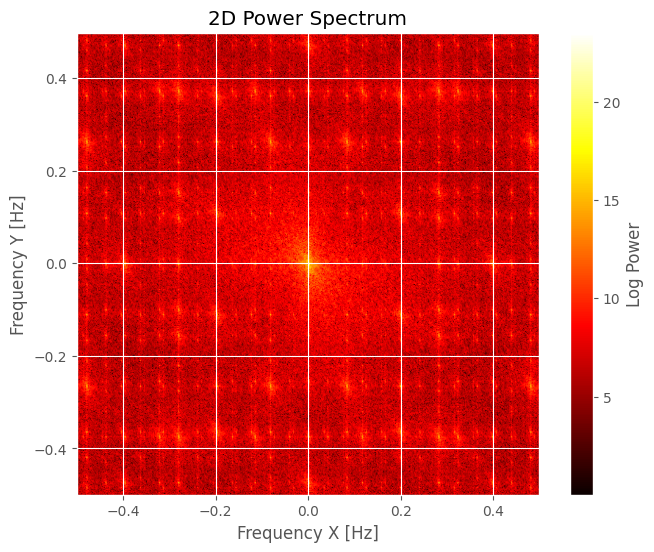

In [75]:
def analyze_2d_fft(image, sample_spacing=1, cmap='hot'):
    """
    Computes and plots the 2D FFT and its power spectrum for a given image.
    
    Parameters:
        image (2D array): Input grayscale image for analysis.
        sample_spacing (float): Sample spacing in the spatial domain.
        cmap (str): Colormap for the power spectrum visualization.
    """
    # Compute the 2D Fourier Transform
    spect_image = fft2(image)
    
    # Compute the power spectrum
    power_spectrum = np.abs(fftshift(spect_image))**2

    # Get the frequencies in both dimensions
    rows, cols = image.shape
    freq_x = fftfreq(cols, d=sample_spacing)
    freq_y = fftfreq(rows, d=sample_spacing)

    # Shift the frequency arrays for visualization
    freq_x_shifted = fftshift(freq_x)
    freq_y_shifted = fftshift(freq_y)

    # Plot the original image
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Plot the power spectrum
    plt.figure(figsize=(8, 6))
    plt.imshow(np.log1p(power_spectrum), cmap=cmap, 
               extent=(freq_x_shifted[0], freq_x_shifted[-1], freq_y_shifted[0], freq_y_shifted[-1]))
    plt.colorbar(label="Log Power")
    plt.title("2D Power Spectrum")
    plt.xlabel("Frequency X [Hz]")
    plt.ylabel("Frequency Y [Hz]")
    plt.show()

# Call the function on the moon image
analyze_2d_fft(moon)

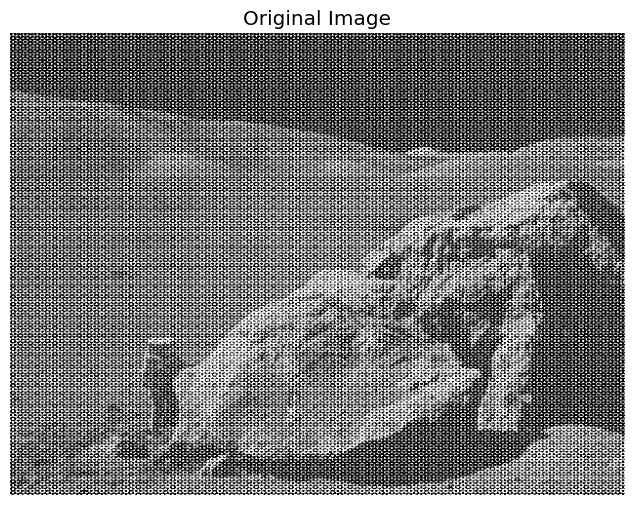

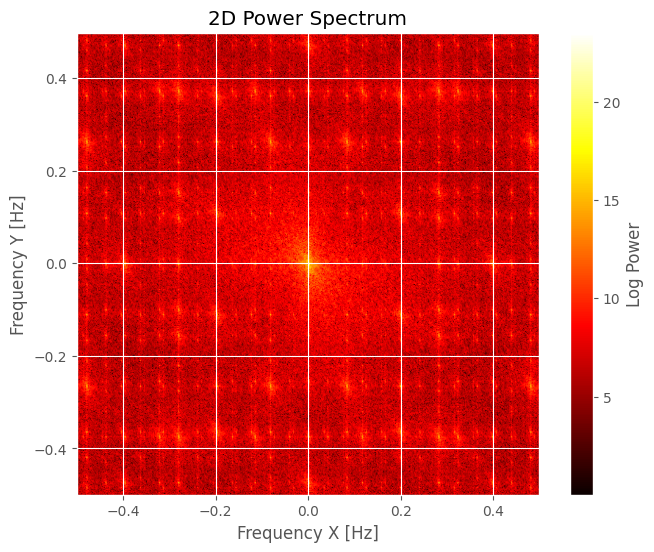

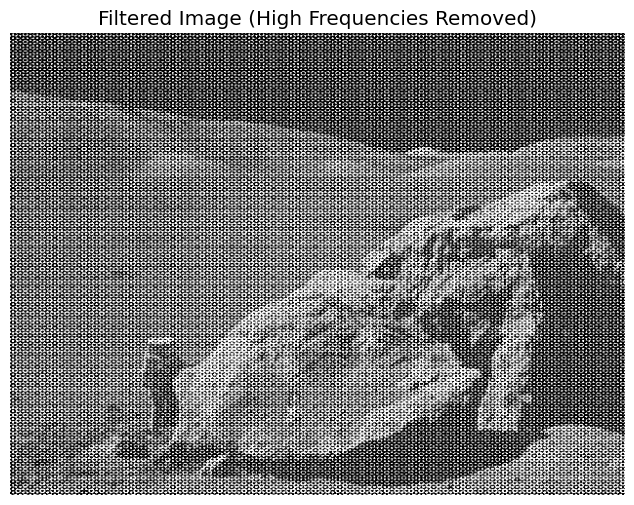

In [127]:
image=moon
sample_spacing=1
cmap='hot'
# Compute the 2D Fourier Transform
spect_image = fft2(image)
    
# Compute the power spectrum
power_spectrum = np.abs(fftshift(spect_image))**2
pos_mask=np.where(power_spectrum > np.max(power_spectrum)/2)
power_spectrum[pos_mask]

# Get the frequencies in both dimensions
rows, cols = image.shape
freq_x = fftfreq(cols, d=sample_spacing)
freq_y = fftfreq(rows, d=sample_spacing)

# Shift the frequency arrays for visualization
freq_x_shifted = fftshift(freq_x)
freq_y_shifted = fftshift(freq_y)

# Plot the original image
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Plot the power spectrum
plt.figure(figsize=(8, 6))
plt.imshow(np.log1p(power_spectrum), cmap=cmap, 
               extent=(freq_x_shifted[0], freq_x_shifted[-1], freq_y_shifted[0], freq_y_shifted[-1]))
plt.colorbar(label="Log Power")
plt.title("2D Power Spectrum")
plt.xlabel("Frequency X [Hz]")
plt.ylabel("Frequency Y [Hz]")
plt.show()


#Inverse FFT

filtered_spectrum = spect_image.copy()
filtered_spectrum[pos_mask] = 0
reconstructed_image = np.abs(ifft2(ifftshift(filtered_spectrum)))

# Filtered Image
plt.figure(figsize=(8, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Filtered Image (High Frequencies Removed)")
plt.axis('off')
plt.show()